In [1]:
import sys
import os
import subprocess

app_base_dir = '/home/spbproc/euso-spb-patt-reco-v1'
if app_base_dir not in sys.path:
    sys.path.append(app_base_dir)

import re
# import collections
import numpy as np
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import getpass
import matplotlib as mpl
import argparse
import glob
# from tqdm import tqdm
import traceback
import hashlib

from utility_funtions import str2bool_argparse

mpl.rcParams['figure.dpi'] = 80

import matplotlib.pyplot as plt

#import ROOT

# import tool.npy_frames_visualization as npy_vis
import tool.acqconv
from data_analysis_utils import *
from event_recognition_efficiency_v3 import *
# import supervised_classification as supc

Welcome to JupyROOT 6.10/00


In [2]:
con = con = pg.connect(dbname='eusospb_data', user='eusospb', host='localhost', password='1e20eVjemeuso')
cur = con.cursor()

In [43]:
simu_signals_all_query = '''
SELECT 
    spb_processing_v3_simu_signal.event.*,

    proc1_x_y_hough_peak_thr1.major_line_phi AS proc1_x_y_hough_peak_thr1_major_line_phi, 
    proc1_gtu_x_hough_peak_thr1.major_line_phi AS proc1_gtu_x_hough_peak_thr1_major_line_phi, 
    proc1_gtu_y_hough_peak_thr1.major_line_phi AS proc1_gtu_y_hough_peak_thr1_major_line_phi,

    proc1_x_y_hough_peak_thr1.major_line_rho AS proc1_x_y_hough_peak_thr1_major_line_rho, 
    proc1_gtu_x_hough_peak_thr1.major_line_rho AS proc1_gtu_x_hough_peak_thr1_major_line_rho, 
    proc1_gtu_y_hough_peak_thr1.major_line_rho AS proc1_gtu_y_hough_peak_thr1_major_line_rho,
    
    proc1_x_y_hough_peak_thr2.major_line_phi AS proc1_x_y_hough_peak_thr2_major_line_phi, 
    proc1_gtu_x_hough_peak_thr2.major_line_phi AS proc1_gtu_x_hough_peak_thr2_major_line_phi, 
    proc1_gtu_y_hough_peak_thr2.major_line_phi AS proc1_gtu_y_hough_peak_thr2_major_line_phi,

    proc1_x_y_hough_peak_thr2.major_line_rho AS proc1_x_y_hough_peak_thr2_major_line_rho, 
    proc1_gtu_x_hough_peak_thr2.major_line_rho AS proc1_gtu_x_hough_peak_thr2_major_line_rho, 
    proc1_gtu_y_hough_peak_thr2.major_line_rho AS proc1_gtu_y_hough_peak_thr2_major_line_rho,
    
    proc1_x_y_hough_peak_thr3.major_line_phi AS proc1_x_y_hough_peak_thr3_major_line_phi, 
    proc1_gtu_x_hough_peak_thr3.major_line_phi AS proc1_gtu_x_hough_peak_thr3_major_line_phi, 
    proc1_gtu_y_hough_peak_thr3.major_line_phi AS proc1_gtu_y_hough_peak_thr3_major_line_phi,
    
    proc1_x_y_hough_peak_thr3.major_line_rho AS proc1_x_y_hough_peak_thr3_major_line_rho, 
    proc1_gtu_x_hough_peak_thr3.major_line_rho AS proc1_gtu_x_hough_peak_thr3_major_line_rho, 
    proc1_gtu_y_hough_peak_thr3.major_line_rho AS proc1_gtu_y_hough_peak_thr3_major_line_rho,
    
    proc1_x_y_hough_peak_thr1.line_clusters_max_sum_clu_width AS proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width,
    proc1_x_y_hough_peak_thr1.line_clusters_max_peak_clu_width AS proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width,
    proc1_x_y_hough_peak_thr2.line_clusters_max_sum_clu_width AS proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width,
    proc1_x_y_hough_peak_thr2.line_clusters_max_peak_clu_width AS proc1_x_y_hough_peak_thr2_line_clusters_max_peak_clu_width,
    proc1_x_y_hough_peak_thr3.line_clusters_max_sum_clu_width AS proc1_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width,
    proc1_x_y_hough_peak_thr3.line_clusters_max_peak_clu_width AS proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width,
    
    proc1_gtu_x_hough_peak_thr1.line_clusters_max_sum_clu_width AS proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width,
    proc1_gtu_x_hough_peak_thr1.line_clusters_max_peak_clu_width AS proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width,
    proc1_gtu_x_hough_peak_thr2.line_clusters_max_sum_clu_width AS proc1_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width,
    proc1_gtu_x_hough_peak_thr2.line_clusters_max_peak_clu_width AS proc1_gtu_x_hough_peak_thr2_line_clusters_max_peak_clu_width,
    proc1_gtu_x_hough_peak_thr3.line_clusters_max_sum_clu_width AS proc1_gtu_x_hough_peak_thr3_line_clusters_max_sum_clu_width,
    proc1_gtu_x_hough_peak_thr3.line_clusters_max_peak_clu_width AS proc1_gtu_x_hough_peak_thr3_line_clusters_max_peak_clu_width,
    
    proc1_gtu_y_hough_peak_thr1.line_clusters_max_sum_clu_width AS proc1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width,
    proc1_gtu_y_hough_peak_thr1.line_clusters_max_peak_clu_width AS proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width,
    proc1_gtu_y_hough_peak_thr2.line_clusters_max_sum_clu_width AS proc1_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width,
    proc1_gtu_y_hough_peak_thr2.line_clusters_max_peak_clu_width AS proc1_gtu_y_hough_peak_thr2_line_clusters_max_peak_clu_width,
    proc1_gtu_y_hough_peak_thr3.line_clusters_max_sum_clu_width AS proc1_gtu_y_hough_peak_thr3_line_clusters_max_sum_clu_width,
    proc1_gtu_y_hough_peak_thr3.line_clusters_max_peak_clu_width AS proc1_gtu_y_hough_peak_thr3_line_clusters_max_peak_clu_width,

    proc1_x_y_hough_peak_thr1.line_clusters_count AS proc1_x_y_hough_peak_thr1_line_clusters_count, 
    proc1_x_y_hough_peak_thr2.line_clusters_count AS proc1_x_y_hough_peak_thr2_line_clusters_count, 
    proc1_x_y_hough_peak_thr3.line_clusters_count AS proc1_x_y_hough_peak_thr3_line_clusters_count, 
    
    proc1_gtu_y_hough_peak_thr1.line_clusters_count AS proc1_gtu_y_hough_peak_thr1_line_clusters_count, 
    proc1_gtu_y_hough_peak_thr2.line_clusters_count AS proc1_gtu_y_hough_peak_thr2_line_clusters_count, 
    proc1_gtu_y_hough_peak_thr3.line_clusters_count AS proc1_gtu_y_hough_peak_thr3_line_clusters_count, 
    
    proc1_gtu_x_hough_peak_thr1.line_clusters_count AS proc1_gtu_x_hough_peak_thr1_line_clusters_count, 
    proc1_gtu_x_hough_peak_thr2.line_clusters_count AS proc1_gtu_x_hough_peak_thr2_line_clusters_count, 
    proc1_gtu_x_hough_peak_thr3.line_clusters_count AS proc1_gtu_x_hough_peak_thr3_line_clusters_count, 
    
    proc1_x_y_clusters.count              AS proc1_x_y_clusters_count, 
    proc1_x_y_clusters.max_sum_clu_width  AS proc1_x_y_clusters_max_sum_clu_width, 
    proc1_x_y_clusters.max_sum_clu_height AS proc1_x_y_clusters_max_sum_clu_height,
    
    proc1_gtu_y_clusters.count              AS proc1_gtu_y_clusters_count, 
    proc1_gtu_y_clusters.max_sum_clu_width  AS proc1_gtu_y_clusters_max_sum_clu_width, 
    proc1_gtu_y_clusters.max_sum_clu_height AS proc1_gtu_y_clusters_max_sum_clu_height ,
    
    proc1_gtu_x_clusters.count              AS proc1_gtu_x_clusters_count, 
    proc1_gtu_x_clusters.max_sum_clu_width  AS proc1_gtu_x_clusters_max_sum_clu_width, 
    proc1_gtu_x_clusters.max_sum_clu_height AS proc1_gtu_x_clusters_max_sum_clu_height,
    
    orig_x_y.sum              AS orig_x_y_sum,
    orig_x_y.count_nonzero    AS orig_x_y_count_nonzero,
    orig_x_y.norm_sum         AS orig_x_y_norm_sum,
    orig_x_y.min              AS orig_x_y_min,
    orig_x_y.max              AS orig_x_y_max,
    orig_x_y.mean             AS orig_x_y_mean,
    orig_x_y.std              AS orig_x_y_std,
    orig_x_y.mean_gz          AS orig_x_y_mean_gz,
    orig_x_y.std_gz           AS orig_x_y_std_gz
    
 FROM spb_processing_v3_simu_signal.event 

 JOIN spb_processing_v3_simu_signal.event_proc1_x_y_hough_peak_thr1 AS proc1_x_y_hough_peak_thr1 USING(event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_y_hough_peak_thr1 AS proc1_gtu_y_hough_peak_thr1 USING(event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_x_hough_peak_thr1 AS proc1_gtu_x_hough_peak_thr1 USING(event_id)

 JOIN spb_processing_v3_simu_signal.event_proc1_x_y_hough_peak_thr2 AS proc1_x_y_hough_peak_thr2 USING(event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_y_hough_peak_thr2 AS proc1_gtu_y_hough_peak_thr2 USING(event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_x_hough_peak_thr2 AS proc1_gtu_x_hough_peak_thr2 USING(event_id)

 JOIN spb_processing_v3_simu_signal.event_proc1_x_y_hough_peak_thr3 AS proc1_x_y_hough_peak_thr3 USING(event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_y_hough_peak_thr3 AS proc1_gtu_y_hough_peak_thr3 USING(event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_x_hough_peak_thr3 AS proc1_gtu_x_hough_peak_thr3 USING(event_id)

 JOIN spb_processing_v3_simu_signal.event_proc1_x_y_clusters   AS proc1_x_y_clusters    USING (event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_x_clusters AS proc1_gtu_x_clusters  USING (event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_y_clusters AS proc1_gtu_y_clusters  USING (event_id)
 
 JOIN spb_processing_v3_simu_signal.event_orig_x_y AS orig_x_y  USING (event_id)
   
WHERE
    source_data_type_num = 10001
    
'''

In [44]:
simu_signals_all_df = psql.read_sql(simu_signals_all_query, con)

In [45]:
len(simu_signals_all_df)

75538

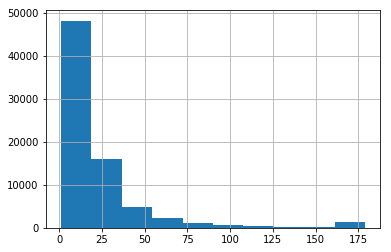

In [116]:
plt.close('all')
simu_signals_all_df['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'].hist()
plt.show()

In [46]:
def draw_lines_legend(line_colors, line_names, show=True):
    lines = []
    tmp_lines_fig, tmp_lines_ax = plt.subplots(1);
    for line_color, line_name in zip(line_colors, line_names):
        lines.append(tmp_lines_ax.plot([0,1],[0,1],'-',color=line_color)[0])
    
    plt.clf()
    
    legend_fig, legend_ax  = plt.subplots(1)
    legend_ax.legend(lines, line_names, loc='center', fontsize='large', mode='expand')
    legend_ax.set_axis_off()
    legend_fig.set_size_inches(6,3);
    
    if show:
        plt.show()
    
    return legend_ax, legend_fig

In [129]:
# limited_max_peak_df = simu_signals_all_df[
#     ~ ( 
#         (
#             (simu_signals_all_df['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#             (simu_signals_all_df['proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#             (simu_signals_all_df['proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#             (simu_signals_all_df['orig_x_y_max'] > 1) 
#         ) | \
#         (simu_signals_all_df['orig_x_y_max'] > 2) 
#     )
# ].sort_values(
#     ['orig_x_y_max','proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width','proc1_x_y_clusters_count'],ascending=[False, True,True])

# limited_max_peak_df = simu_signals_all_df[
#     (simu_signals_all_df['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#     (simu_signals_all_df['proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#     (simu_signals_all_df['proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#     (simu_signals_all_df['orig_x_y_max'] > 1) 
# ].sort_values(
#     ['proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width','proc1_x_y_clusters_count'],ascending=[False,False])


limited_max_peak_df = simu_signals_all_df[
#     (simu_signals_all_df['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#     (simu_signals_all_df['proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#     (simu_signals_all_df['proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) #& \
    (simu_signals_all_df['orig_x_y_max'] > 2) 
].sort_values(
    ['proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width','proc1_x_y_clusters_count'],ascending=[False,False])

In [130]:
len(limited_max_peak_df)

15616

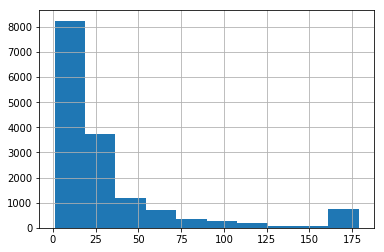

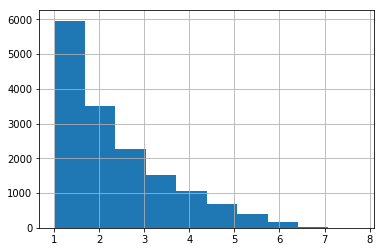

In [131]:
plt.close('all')
limited_max_peak_df['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'].hist()
plt.show()
limited_max_peak_df['orig_x_y_mean_gz'].hist()
plt.show()

In [132]:
_prev_max_columns = pd.get_option('display.max_columns')
pd.set_option('display.max_columns', 500)
limited_max_peak_df

,event_id,config_info_id,program_version,timestamp,source_file_acquisition_full,source_file_trigger_full,source_file_acquisition,source_file_trigger,global_gtu,packet_id,gtu_in_packet,num_gtu,source_data_type_num,proc1_x_y_hough_peak_thr1_major_line_phi,proc1_gtu_x_hough_peak_thr1_major_line_phi,proc1_gtu_y_hough_peak_thr1_major_line_phi,proc1_x_y_hough_peak_thr1_major_line_rho,proc1_gtu_x_hough_peak_thr1_major_line_rho,proc1_gtu_y_hough_peak_thr1_major_line_rho,proc1_x_y_hough_peak_thr2_major_line_phi,proc1_gtu_x_hough_peak_thr2_major_line_phi,proc1_gtu_y_hough_peak_thr2_major_line_phi,proc1_x_y_hough_peak_thr2_major_line_rho,proc1_gtu_x_hough_peak_thr2_major_line_rho,proc1_gtu_y_hough_peak_thr2_major_line_rho,proc1_x_y_hough_peak_thr3_major_line_phi,proc1_gtu_x_hough_peak_thr3_major_line_phi,proc1_gtu_y_hough_peak_thr3_major_line_phi,proc1_x_y_hough_peak_thr3_major_line_rho,proc1_gtu_x_hough_peak_thr3_major_line_rho,proc1_gtu_y_hough_peak_thr3_major_line_rho,proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr2_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width,proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_gtu_x_hough_peak_thr2_line_clusters_max_peak_clu_width,proc1_gtu_x_hough_peak_thr3_line_clusters_max_sum_clu_width,proc1_gtu_x_hough_peak_thr3_line_clusters_max_peak_clu_width,proc1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_gtu_y_hough_peak_thr2_line_clusters_max_peak_clu_width,proc1_gtu_y_hough_peak_thr3_line_clusters_max_sum_clu_width,proc1_gtu_y_hough_peak_thr3_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_count,proc1_x_y_hough_peak_thr2_line_clusters_count,proc1_x_y_hough_peak_thr3_line_clusters_count,proc1_gtu_y_hough_peak_thr1_line_clusters_count,proc1_gtu_y_hough_peak_thr2_line_clusters_count,proc1_gtu_y_hough_peak_thr3_line_clusters_count,proc1_gtu_x_hough_peak_thr1_line_clusters_count,proc1_gtu_x_hough_peak_thr2_line_clusters_count,proc1_gtu_x_hough_peak_thr3_line_clusters_count,proc1_x_y_clusters_count,proc1_x_y_clusters_max_sum_clu_width,proc1_x_y_clusters_max_sum_clu_height,proc1_gtu_y_clusters_count,proc1_gtu_y_clusters_max_sum_clu_width,proc1_gtu_y_clusters_max_sum_clu_height,proc1_gtu_x_clusters_count,proc1_gtu_x_clusters_max_sum_clu_width,proc1_gtu_x_clusters_max_sum_clu_height,orig_x_y_sum,orig_x_y_count_nonzero,orig_x_y_norm_sum,orig_x_y_min,orig_x_y_max,orig_x_y_mean,orig_x_y_std,orig_x_y_mean_gz,orig_x_y_std_gz
69355,69489,1,3.0,1525845201,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,None,posz_24000000.00/energy_6.85e+12/simu.2017-07-...,None,30,0,30,38,10001,6.193290,4.908290,6.182060,0.193339,1.68812,11.80780,6.236610,4.818200,6.142640,0.368349,0.527268,11.74270,6.274410,4.794760,6.055030,1.500010,0.637081,10.72090,18,2,14,14,179,179,92,1,19,5,4,4,30,30,14,1,1,1,2,1,1,1,2,1,3,5,3,7,33,23,2,32,48,4,21,47,39,36,13.00000,0,3,0.016927,0.141820,1.08333,0.363242
53936,54066,1,3.0,1525836907,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,None,posz_24000000.00/energy_5.62e+12/thousnd24E15....,None,30,0,30,38,10001,0.230037,5.816140,0.242154,4.424520,18.31260,23.87380,0.170422,5.834200,0.270581,4.050340,18.670800,24.04520,0.008610,5.770740,0.280813,1.558520,17.718400,24.27910,47,47,32,32,179,179,47,1,28,28,19,19,15,15,10,10,1,1,1,1,1,1,1,1,2,1,1,6,27,46,2,24,46,3,24,27,79,68,26.33330,0,3,0.034288,0.212756,1.16176,0.473109
15589,15705,1,3.0,1525828735,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,None,posz_21000000.00/energy_2.51e+12/thousnd21E8.2...,None,3

In [135]:
pd.set_option('display.max_columns', _prev_max_columns)

In [137]:
limited_max_peak_df = limited_max_peak_df[ limited_max_peak_df['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] > 165 ]

In [148]:
_prev_max_columns = pd.get_option('display.max_columns')
pd.set_option('display.max_columns', 500)
limited_max_peak_df

,event_id,config_info_id,program_version,timestamp,source_file_acquisition_full,source_file_trigger_full,source_file_acquisition,source_file_trigger,global_gtu,packet_id,gtu_in_packet,num_gtu,source_data_type_num,proc1_x_y_hough_peak_thr1_major_line_phi,proc1_gtu_x_hough_peak_thr1_major_line_phi,proc1_gtu_y_hough_peak_thr1_major_line_phi,proc1_x_y_hough_peak_thr1_major_line_rho,proc1_gtu_x_hough_peak_thr1_major_line_rho,proc1_gtu_y_hough_peak_thr1_major_line_rho,proc1_x_y_hough_peak_thr2_major_line_phi,proc1_gtu_x_hough_peak_thr2_major_line_phi,proc1_gtu_y_hough_peak_thr2_major_line_phi,proc1_x_y_hough_peak_thr2_major_line_rho,proc1_gtu_x_hough_peak_thr2_major_line_rho,proc1_gtu_y_hough_peak_thr2_major_line_rho,proc1_x_y_hough_peak_thr3_major_line_phi,proc1_gtu_x_hough_peak_thr3_major_line_phi,proc1_gtu_y_hough_peak_thr3_major_line_phi,proc1_x_y_hough_peak_thr3_major_line_rho,proc1_gtu_x_hough_peak_thr3_major_line_rho,proc1_gtu_y_hough_peak_thr3_major_line_rho,proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr2_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width,proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_gtu_x_hough_peak_thr2_line_clusters_max_peak_clu_width,proc1_gtu_x_hough_peak_thr3_line_clusters_max_sum_clu_width,proc1_gtu_x_hough_peak_thr3_line_clusters_max_peak_clu_width,proc1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_gtu_y_hough_peak_thr2_line_clusters_max_peak_clu_width,proc1_gtu_y_hough_peak_thr3_line_clusters_max_sum_clu_width,proc1_gtu_y_hough_peak_thr3_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_count,proc1_x_y_hough_peak_thr2_line_clusters_count,proc1_x_y_hough_peak_thr3_line_clusters_count,proc1_gtu_y_hough_peak_thr1_line_clusters_count,proc1_gtu_y_hough_peak_thr2_line_clusters_count,proc1_gtu_y_hough_peak_thr3_line_clusters_count,proc1_gtu_x_hough_peak_thr1_line_clusters_count,proc1_gtu_x_hough_peak_thr2_line_clusters_count,proc1_gtu_x_hough_peak_thr3_line_clusters_count,proc1_x_y_clusters_count,proc1_x_y_clusters_max_sum_clu_width,proc1_x_y_clusters_max_sum_clu_height,proc1_gtu_y_clusters_count,proc1_gtu_y_clusters_max_sum_clu_width,proc1_gtu_y_clusters_max_sum_clu_height,proc1_gtu_x_clusters_count,proc1_gtu_x_clusters_max_sum_clu_width,proc1_gtu_x_clusters_max_sum_clu_height,orig_x_y_sum,orig_x_y_count_nonzero,orig_x_y_norm_sum,orig_x_y_min,orig_x_y_max,orig_x_y_mean,orig_x_y_std,orig_x_y_mean_gz,orig_x_y_std_gz
64774,64906,1,3.0,1525842162,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,None,posz_24000000.00/energy_6.85e+12/simu.2017-07-...,None,30,0,30,38,10001,5.797680,6.135340,6.205530,1.210400,4.136410,3.59707,1.856010,6.118210,5.470160,0.309364,4.121040,2.12036,0.026326,6.118210,6.148630,1.578520,4.121040,4.05430,179,179,18,18,179,179,9,9,4,4,4,4,179,179,51,51,4,4,1,3,1,1,2,1,1,1,1,5,4,2,2,7,16,3,6,4,15,9,3.00000,0,5,0.006510,0.129941,1.66667,1.247220
18772,18892,1,3.0,1525829246,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,None,posz_27000000.00/energy_3.16e+12/thousnd27E10....,None,30,0,30,38,10001,5.987930,0.216015,0.296952,40.973400,19.244000,10.24140,0.030818,0.124261,0.245245,43.306000,15.844200,10.39440,0.356172,0.157957,0.078979,41.651300,17.279100,10.27910,178,178,170,170,179,179,68,68,5,5,1,1,71,71,36,36,4,4,1,1,2,1,2,1,2,1,1,2,11,13,2,11,13,1,16,11,21,13,5.25000,0,4,0.009115,0.142535,1.61538,1.002950
6450,6565,1,3.0,1525827249,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,None,posz_33000000.00/energy_1.58e+12/thousnd33E4.2...,None,30,0

In [150]:
vis_df = limited_max_peak_df[90*5:]
vis_df

,event_id,config_info_id,program_version,timestamp,source_file_acquisition_full,source_file_trigger_full,source_file_acquisition,source_file_trigger,global_gtu,packet_id,gtu_in_packet,num_gtu,source_data_type_num,proc1_x_y_hough_peak_thr1_major_line_phi,proc1_gtu_x_hough_peak_thr1_major_line_phi,proc1_gtu_y_hough_peak_thr1_major_line_phi,proc1_x_y_hough_peak_thr1_major_line_rho,proc1_gtu_x_hough_peak_thr1_major_line_rho,proc1_gtu_y_hough_peak_thr1_major_line_rho,proc1_x_y_hough_peak_thr2_major_line_phi,proc1_gtu_x_hough_peak_thr2_major_line_phi,proc1_gtu_y_hough_peak_thr2_major_line_phi,proc1_x_y_hough_peak_thr2_major_line_rho,proc1_gtu_x_hough_peak_thr2_major_line_rho,proc1_gtu_y_hough_peak_thr2_major_line_rho,proc1_x_y_hough_peak_thr3_major_line_phi,proc1_gtu_x_hough_peak_thr3_major_line_phi,proc1_gtu_y_hough_peak_thr3_major_line_phi,proc1_x_y_hough_peak_thr3_major_line_rho,proc1_gtu_x_hough_peak_thr3_major_line_rho,proc1_gtu_y_hough_peak_thr3_major_line_rho,proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr2_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width,proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_gtu_x_hough_peak_thr2_line_clusters_max_peak_clu_width,proc1_gtu_x_hough_peak_thr3_line_clusters_max_sum_clu_width,proc1_gtu_x_hough_peak_thr3_line_clusters_max_peak_clu_width,proc1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_gtu_y_hough_peak_thr2_line_clusters_max_peak_clu_width,proc1_gtu_y_hough_peak_thr3_line_clusters_max_sum_clu_width,proc1_gtu_y_hough_peak_thr3_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_count,proc1_x_y_hough_peak_thr2_line_clusters_count,proc1_x_y_hough_peak_thr3_line_clusters_count,proc1_gtu_y_hough_peak_thr1_line_clusters_count,proc1_gtu_y_hough_peak_thr2_line_clusters_count,proc1_gtu_y_hough_peak_thr3_line_clusters_count,proc1_gtu_x_hough_peak_thr1_line_clusters_count,proc1_gtu_x_hough_peak_thr2_line_clusters_count,proc1_gtu_x_hough_peak_thr3_line_clusters_count,proc1_x_y_clusters_count,proc1_x_y_clusters_max_sum_clu_width,proc1_x_y_clusters_max_sum_clu_height,proc1_gtu_y_clusters_count,proc1_gtu_y_clusters_max_sum_clu_width,proc1_gtu_y_clusters_max_sum_clu_height,proc1_gtu_x_clusters_count,proc1_gtu_x_clusters_max_sum_clu_width,proc1_gtu_x_clusters_max_sum_clu_height,orig_x_y_sum,orig_x_y_count_nonzero,orig_x_y_norm_sum,orig_x_y_min,orig_x_y_max,orig_x_y_mean,orig_x_y_std,orig_x_y_mean_gz,orig_x_y_std_gz
31012,31133,1,3.0,1525831217,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,None,posz_30000000.00/energy_5.62e+12/thousnd30E15....,None,30,0,30,38,10001,0.180094,0.187728,5.991180,51.799700,28.498400,7.83589,0.100030,0.456973,6.001370,48.269000,36.715300,8.38455,5.838860,6.279220,6.065800,22.441100,21.485100,11.853500,178,178,173,173,13,10,176,176,136,5,37,1,70,70,57,57,15,15,1,1,3,1,1,1,1,3,3,4,21,9,6,8,7,3,23,15,42,28,6.00000,0,7,0.018229,0.217740,1.50000,1.295600
32254,32375,1,3.0,1525831428,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,None,posz_30000000.00/energy_5.62e+12/thousnd30E15....,None,30,0,30,38,10001,0.450808,6.191120,0.110138,35.684900,20.394800,26.90010,0.550498,6.193820,0.114141,39.352100,20.448000,27.12430,0.416366,6.175220,0.122856,36.082800,19.933400,27.279100,168,168,53,1,10,10,30,30,21,21,18,18,179,179,8,8,1,1,1,2,2,1,1,1,1,1,1,4,30,21,3,22,42,5,8,21,52,45,10.40000,0,5,0.022569,0.182606,1.15556,0.630892
5210,5325,1,3.0,1525826879,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,None,posz_27000000.00/energy_1.41e+12/thousnd2

In [151]:
pd.set_option('display.max_columns', _prev_max_columns)

/home/spbproc/SPBDATA_processed/spb_simu/posz_30000000.00/energy_5.62e+12/thousnd30E15.2017-07-25-12h04m55s/simu2npy/ev_28_mc_1__signals.npy /home/spbproc/SPBDATA_processed/spb_simu/posz_30000000.00/energy_5.62e+12/thousnd30E15.2017-07-25-12h04m55s/simu2npy/ev_28_mc_1__signals.npy #0 i31133 (-4, 34)
len(event_frames)=34 n_event_frames_count=38 n_event_frames.shape=(38, 48, 48) n_event_frames_offset=4 event_frames_sec_len=34 event_frames_offset=0
/home/spbproc/SPBDATA_processed/spb_simu/posz_30000000.00/energy_5.62e+12/thousnd30E15.2017-07-25-12h44m16s/simu2npy/ev_80_mc_1__signals.npy /home/spbproc/SPBDATA_processed/spb_simu/posz_30000000.00/energy_5.62e+12/thousnd30E15.2017-07-25-12h44m16s/simu2npy/ev_80_mc_1__signals.npy #1 i32375 (-4, 34)
len(event_frames)=24 n_event_frames_count=38 n_event_frames.shape=(38, 48, 48) n_event_frames_offset=4 event_frames_sec_len=24 event_frames_offset=0
/home/spbproc/SPBDATA_processed/spb_simu/posz_27000000.00/energy_1.41e+12/thousnd27E3.2017-07-24-15h

/home/spbproc/SPBDATA_processed/spb_simu/posz_24000000.00/energy_4.15e+12/simu.2017-07-17-18h13m27s/simu2npy/ev_68_mc_1__signals.npy /home/spbproc/SPBDATA_processed/spb_simu/posz_24000000.00/energy_4.15e+12/simu.2017-07-17-18h13m27s/simu2npy/ev_68_mc_1__signals.npy #19 i44258 (-4, 34)
len(event_frames)=21 n_event_frames_count=38 n_event_frames.shape=(38, 48, 48) n_event_frames_offset=4 event_frames_sec_len=21 event_frames_offset=0
/home/spbproc/SPBDATA_processed/spb_simu/posz_24000000.00/energy_5.01e+12/thousnd24E14.2017-07-26-05h57m02s/simu2npy/ev_44_mc_1__signals.npy /home/spbproc/SPBDATA_processed/spb_simu/posz_24000000.00/energy_5.01e+12/thousnd24E14.2017-07-26-05h57m02s/simu2npy/ev_44_mc_1__signals.npy #20 i48795 (-4, 34)
len(event_frames)=52 n_event_frames_count=38 n_event_frames.shape=(38, 48, 48) n_event_frames_offset=4 event_frames_sec_len=34 event_frames_offset=0
/home/spbproc/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.00e+12/Csegv24.2017-07-07-15h03m45s/simu2npy/ev

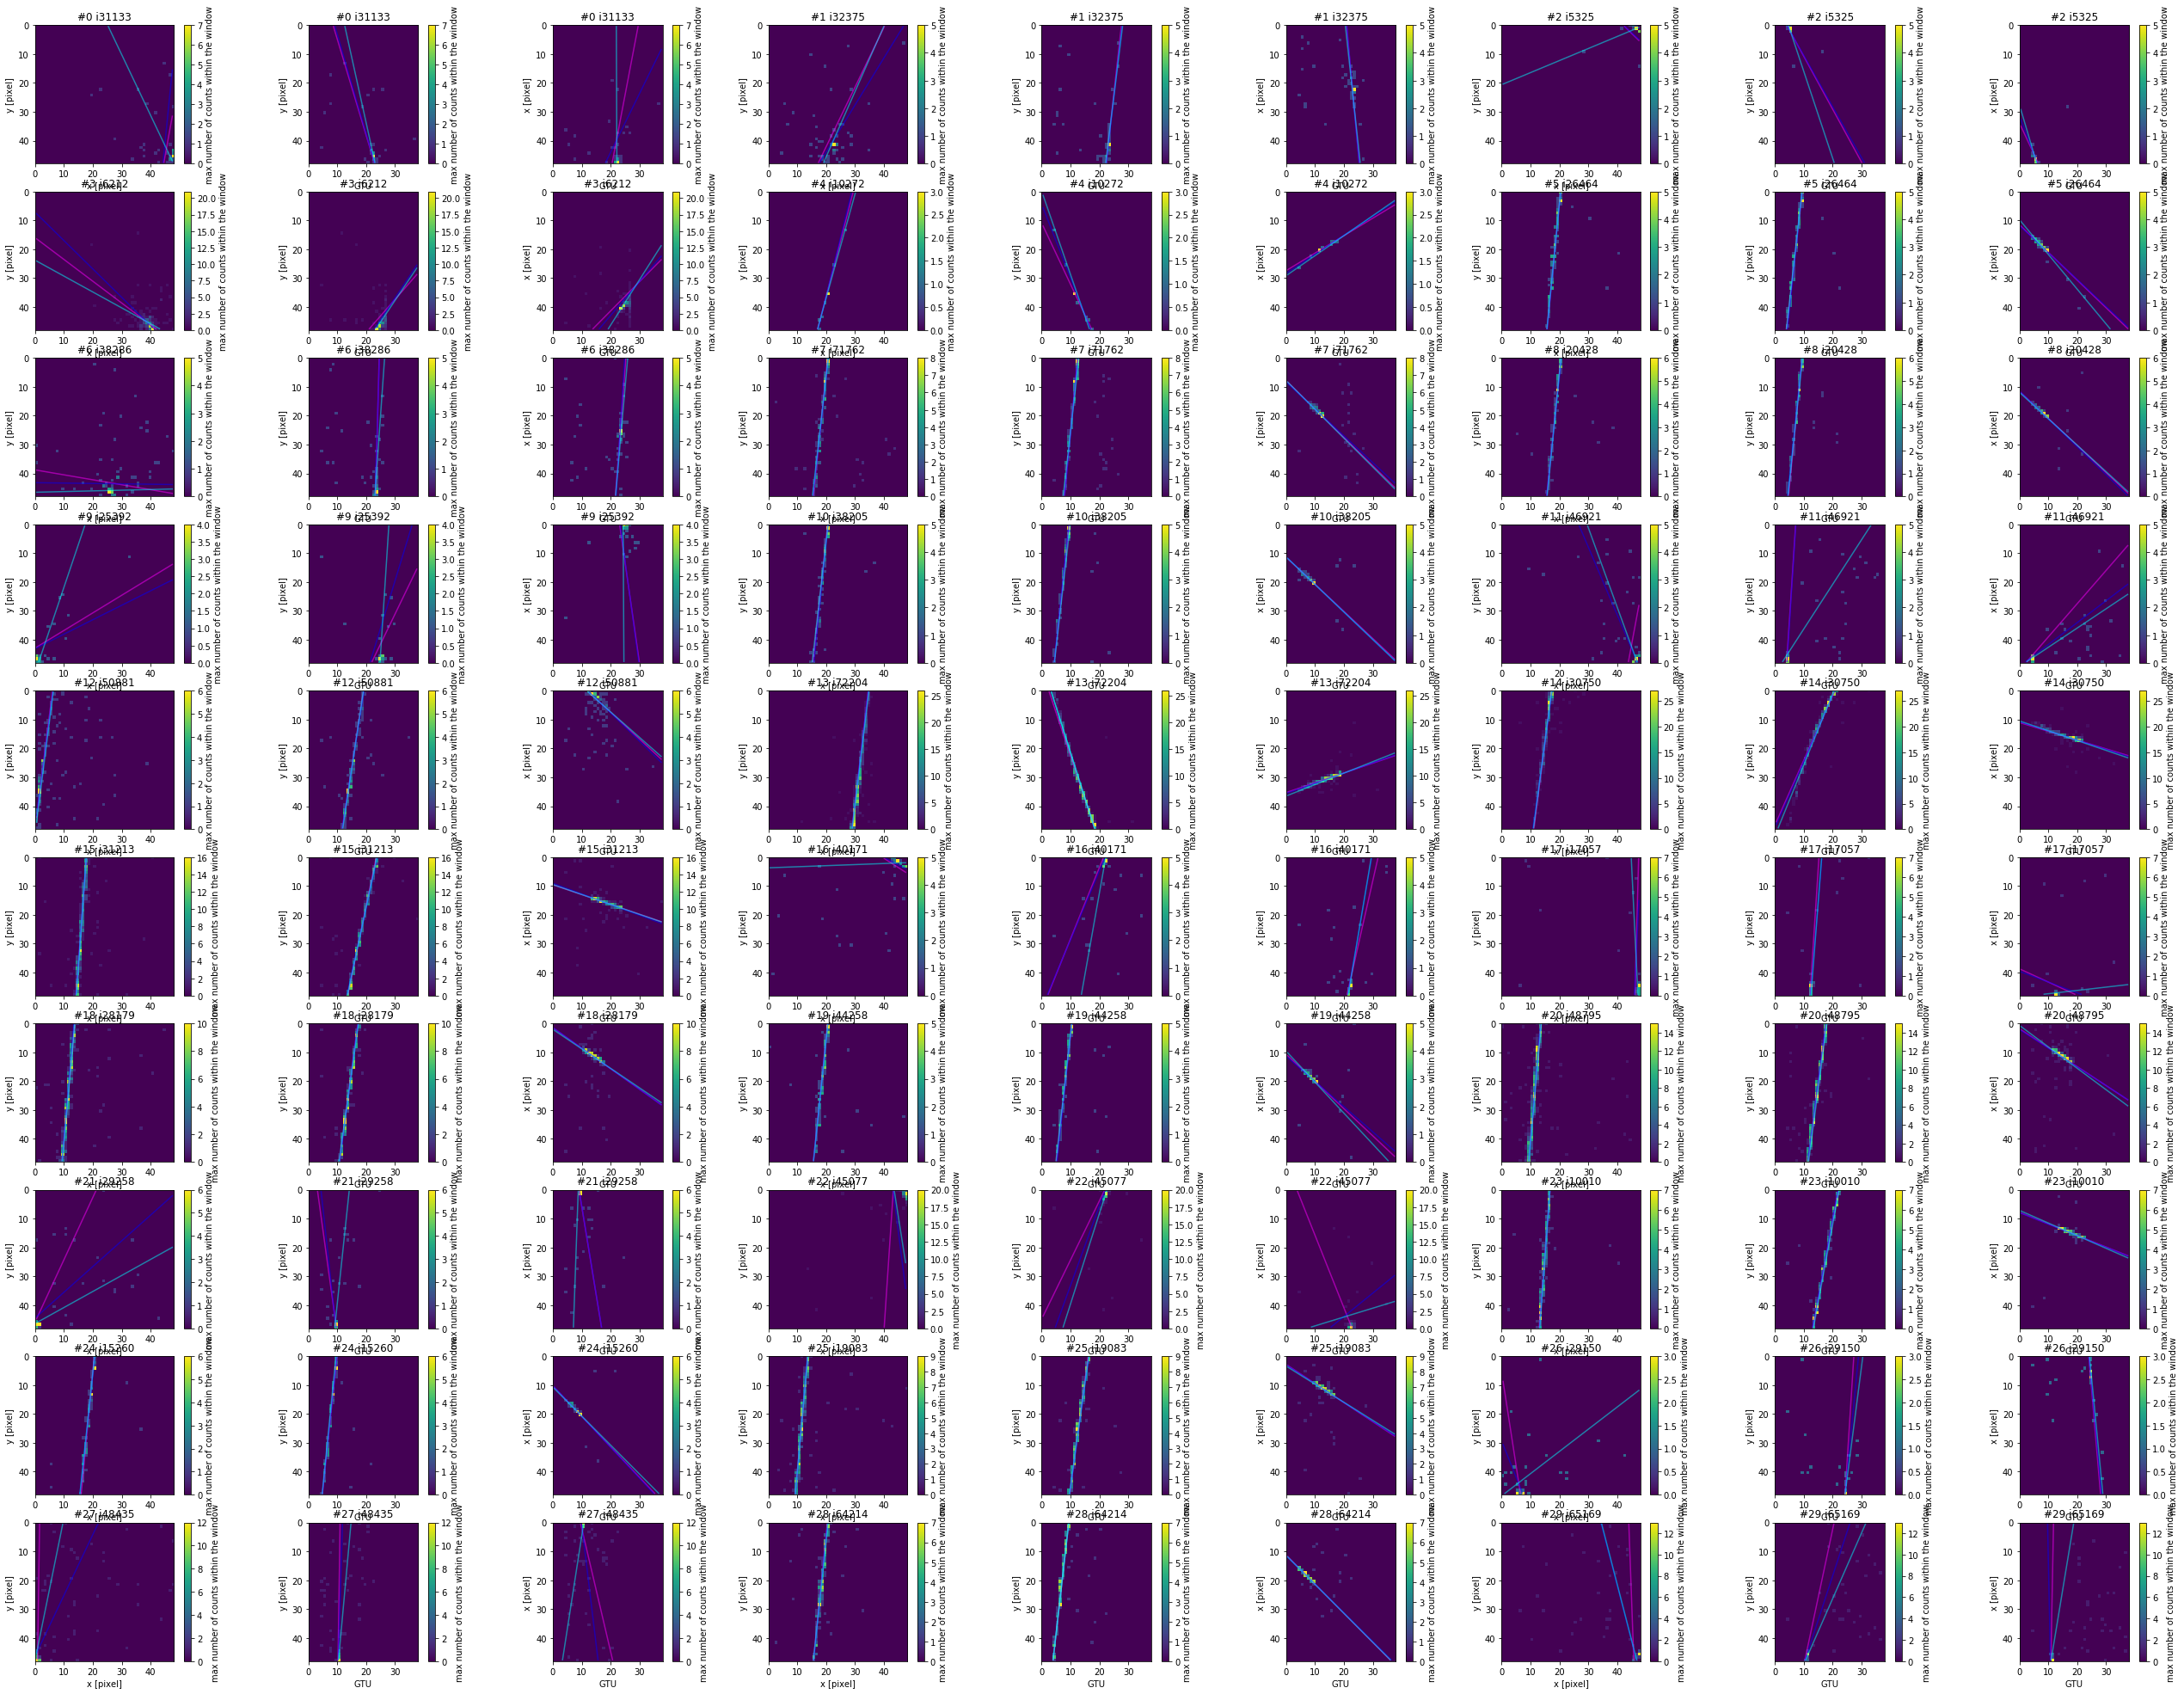

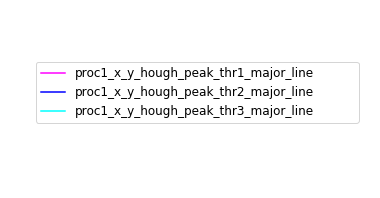

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa9d67e4e80>,
 <matplotlib.figure.Figure at 0x7faa3a9b1630>)

In [152]:
vis_events_line_colors = ['#FF00FF','#0000FF','#00FFFF','#80FF00','#FF8000','#FF0000','yellow']
vis_events_line_columns_x_y = [('proc1_x_y_hough_peak_thr1_major_line_rho','proc1_x_y_hough_peak_thr1_major_line_phi'),('proc1_x_y_hough_peak_thr2_major_line_rho','proc1_x_y_hough_peak_thr2_major_line_phi'),('proc1_x_y_hough_peak_thr3_major_line_rho','proc1_x_y_hough_peak_thr3_major_line_phi')] 
vis_events_line_columns_gtu_x = [('proc1_gtu_x_hough_peak_thr1_major_line_rho','proc1_gtu_x_hough_peak_thr1_major_line_phi'),('proc1_gtu_x_hough_peak_thr2_major_line_rho','proc1_gtu_x_hough_peak_thr2_major_line_phi'),('proc1_gtu_x_hough_peak_thr3_major_line_rho','proc1_gtu_x_hough_peak_thr3_major_line_phi')] 
vis_events_line_columns_gtu_y = [('proc1_gtu_y_hough_peak_thr1_major_line_rho','proc1_gtu_y_hough_peak_thr1_major_line_phi'),('proc1_gtu_y_hough_peak_thr2_major_line_rho','proc1_gtu_y_hough_peak_thr2_major_line_phi'),('proc1_gtu_y_hough_peak_thr3_major_line_rho','proc1_gtu_y_hough_peak_thr3_major_line_phi')] 


# vis_events_df(vis_df, events_per_figure=50, max_figures=1, vis_gtux=True, vis_gtuy=True, close_after_vis=False, show=True, 
#               line_columns_x_y=vis_events_line_columns_x_y, 
#               line_columns_gtu_x=vis_events_line_columns_gtu_x, 
#               line_columns_gtu_y=vis_events_line_columns_gtu_y,
#              line_colors=vis_events_line_colors, line_alpha=0.3)

plt.close('all')

fig, axs = plt.subplots(10, 9)
fig.set_size_inches(9*5,7*5)
axs_flattened = axs.flatten()
ai = 0

for i,(rid,r) in enumerate(vis_df.iterrows()):
    simu_gtu_start = r['gtu_in_packet']-4-30
    simu_gtu_end = simu_gtu_start+r['num_gtu']
    
    lines_xy = [(r[l[0]],r[l[1]]) for l in vis_events_line_columns_x_y]
    lines_gtux = [(r[l[0]],r[l[1]]) for l in vis_events_line_columns_gtu_x]
    lines_gtuy = [(r[l[0]],r[l[1]]) for l in vis_events_line_columns_gtu_y]
    
    if ai+2 >= len(axs_flattened):
        break
    
    print( r['source_file_acquisition_full'], r['source_file_acquisition_full'], "#{} i{}".format(i, r['event_id']), (simu_gtu_start,simu_gtu_end) )
    visualize_simu_event_projections(r['source_file_acquisition_full'], title="#{} i{}".format(i, r['event_id']), axs_flattened=axs_flattened, 
                                    lines_xy=lines_xy, lines_gtux=lines_gtux, lines_gtuy=lines_gtuy, line_colors=vis_events_line_colors, line_alpha=.5, vis_xy=True, vis_gtux=True, vis_gtuy=True, ai=ai,
                                    gtu_range=(simu_gtu_start, simu_gtu_end), get_simunpy_func=lambda acq: acq)
    ai += 3
    
    if ai >= len(axs_flattened):
        break

vis_events_line_names = [os.path.commonprefix([col_rho,col_phi])[:-1] for col_rho, col_phi in vis_events_line_columns_x_y]
draw_lines_legend(vis_events_line_colors, vis_events_line_names)

In [ ]:
plt.close('all')

fig, axs = plt.subplots(10, 9)
fig.set_size_inches(9*5,7*5)
axs_flattened = axs.flatten()
ai = 0

for i,(rid,r) in enumerate(vis_df.iterrows()):
    simu_gtu_start = r['gtu_in_packet']-4-30
    simu_gtu_end = simu_gtu_start+r['num_gtu']
    
    if ai+2 >= len(axs_flattened):
        break
    
    ax.plot(
        ,
        [r['proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width'],
         r['proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width'],
         r[]'proc1_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width']]
    )
    
    ai += 3
    
    if ai >= len(axs_flattened):
        break